## Importing necessary libraries

In [20]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PyTorch, Torchvision, and vision related libraries
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision
import torch_optimizer as tor_optim
from torch.optim import Adam, RMSprop, SGD
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet50, shufflenetv2

# OpenCV, Pillow, SKImage, Albumentations
import cv2
import PIL
import albumentations as al
from albumentations.pytorch import ToTensorV2
from PIL import Image
from skimage import io

# Logging and inbuilt libraries
import wandb # weights and biases library
import pickle
import random, os, sys, logging
import ipywidgets as widgets
from tqdm import tqdm
from ipywidgets import interact,interactive,interact_manual
import warnings
warnings.filterwarnings("ignore")

logging.propagate = False
logging.getLogger().setLevel(logging.ERROR)


## Reading Images

In [2]:
# Specify the folder names required for generating paths below
train_good = ['images', 'train', 'good']
train_bad  = ['images', 'train', 'bad']
test_good  = ['images', 'test', 'good']
test_bad   = ['images', 'test', 'bad']

In [3]:
# Generate required paths for the train and test folders
owd = os.getcwd()
train_good = os.path.join(owd,*train_good)
train_bad  = os.path.join(owd,*train_bad)
test_good  = os.path.join(owd,*test_good)
test_bad   = os.path.join(owd,*test_bad)

print(f'Train Good Images Directory: {train_good}')
print(f'Train Bad Images Directory: {train_bad}')
print(f'Test Good Images Directory: {test_good}')
print(f'Test Bad Images Directory: {test_bad}')

Train Good Images Directory: C:\Users\abhij\OneDrive - Indiana University\3rd Semester\Intro to Intelligent Systems\Project\images\train\good
Train Bad Images Directory: C:\Users\abhij\OneDrive - Indiana University\3rd Semester\Intro to Intelligent Systems\Project\images\train\bad
Test Good Images Directory: C:\Users\abhij\OneDrive - Indiana University\3rd Semester\Intro to Intelligent Systems\Project\images\test\good
Test Bad Images Directory: C:\Users\abhij\OneDrive - Indiana University\3rd Semester\Intro to Intelligent Systems\Project\images\test\bad


In [45]:
for infile in os.listdir(train_good):
    print(infile)

IMG_20170614_120303886.jpg
IMG_20170614_120308063.jpg
IMG_20170614_120315387.jpg
IMG_20170614_120327108.jpg
IMG_20170614_120340187.jpg
IMG_20170614_120348169.jpg
IMG_20170614_120351584.jpg
IMG_20170614_120423701.jpg
IMG_20170614_120436012.jpg
IMG_20170614_120442497.jpg
IMG_20170614_120505848.jpg
IMG_20170614_120507501.jpg
IMG_20170614_121217958_HDR.jpg
IMG_20170614_121222933.jpg
IMG_20170614_121244752.jpg
IMG_20170614_121303102.jpg
IMG_20170614_121306857.jpg
IMG_20170614_121311304_HDR.jpg
IMG_20170614_121320991.jpg
IMG_20170614_121325200.jpg
IMG_20170614_121333238.jpg
IMG_20170614_121335628.jpg
IMG_20170614_121338413.jpg
IMG_20170614_121352119.jpg
IMG_20170614_121405394.jpg
IMG_20170614_121408361.jpg
IMG_20170614_121413552.jpg
IMG_20170614_121416645.jpg
IMG_20170614_121430764.jpg
IMG_20170614_121436051.jpg
IMG_20170614_121450851.jpg
IMG_20170614_121455251.jpg
IMG_20170614_121500979.jpg
IMG_20170614_121509688.jpg
IMG_20170614_121511538.jpg
IMG_20170614_121514611.jpg
IMG_20170614_1215250

In [46]:
for infile in os.listdir(train_bad):
    print(infile)

IMG-20170615-WA0019.jpg
IMG-20170615-WA0021.jpg
IMG-20170615-WA0022.jpg
IMG-20170615-WA0023.jpg
IMG-20170615-WA0024.jpg
IMG-20170615-WA0028.jpg
IMG-20170615-WA0029.jpg
IMG_20170614_121001420.jpg
IMG_20170614_121006794.jpg
IMG_20170614_121016213.jpg
IMG_20170614_121123065.jpg
IMG_20170614_121133283.jpg
IMG_20170614_122811483.jpg
IMG_20170614_123326776.jpg
IMG_20170614_123336573.jpg
IMG_20170614_123640280.jpg
IMG_20170614_123726394.jpg
IMG_20170614_123734511.jpg
IMG_20170614_123739455.jpg
IMG_20170614_123742334.jpg
IMG_20170614_123747833_HDR.jpg
IMG_20170614_130814967.jpg
IMG_20170614_131001970.jpg
IMG_20170614_131331353.jpg
IMG_20170614_131430610.jpg
IMG_20170614_131433180_HDR.jpg
IMG_20170614_131515933.jpg
IMG_20170614_131528301.jpg


In [49]:
for infile in os.listdir(test_good):
    print(infile)

IMG_20170614_121222933.jpg
IMG_20170614_121316675_HDR.jpg
IMG_20170614_121430764.jpg
IMG_20170614_121557174.jpg
IMG_20170614_122025190.jpg
IMG_20170614_122030779.jpg
IMG_20170614_122033442.jpg
IMG_20170614_122738699.jpg
IMG_20170614_123313011.jpg
IMG_20170614_123557814.jpg
IMG_20170614_123858125.jpg
IMG_20170614_123904444.jpg
IMG_20170614_123910333.jpg
IMG_20170614_124246257.jpg
IMG_20170614_130609503.jpg


In [54]:
for infile in os.listdir(test_bad):
    im = Image.open(os.path.join(test_bad,infile))
    #im.show()
    print(infile)
    

IMG-20170615-WA0020.jpg
IMG-20170615-WA0021.jpg
IMG-20170615-WA0022.jpg
IMG-20170615-WA0023.jpg
IMG_20170614_121006794.jpg
IMG_20170614_121016213.jpg
IMG_20170614_121126744.jpg
IMG_20170614_121133283.jpg
IMG_20170614_121143540.jpg
IMG_20170614_123640280.jpg
IMG_20170614_123739455.jpg
IMG_20170614_123747833_HDR.jpg
IMG_20170614_130725994.jpg
IMG_20170614_130814967.jpg
IMG_20170614_131531821.jpg


## Image Pre-Processing and Augmentation

In [4]:
# Resizing Images
HEIGHT = 128
WIDTH  = 128

In [6]:
# Defining Transformations required for augmenting the images
transform = al.Compose([
            al.Resize(width=WIDTH, height=HEIGHT,p=1.0),
    
            al.Rotate(limit=90, p=1.0),
    
            al.HorizontalFlip(p=0.3),
    
            al.VerticalFlip(p=0.2),
    
            al.ColorJitter(contrast=2, p=0.2),
    
            al.ColorJitter(brightness=2, p=0.2),
    
            al.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            p=1.0),
])

In [4]:
# Augmented Images Directories
aug_train_good = 'C:/Users/abhij/OneDrive - Indiana University/3rd Semester/Intro to Intelligent Systems/Project/images/aug_train/good'
aug_train_bad  = 'C:/Users/abhij/OneDrive - Indiana University/3rd Semester/Intro to Intelligent Systems/Project/images/aug_train/bad'

In [156]:
def augment(IMG_DIR, AUG_PATH_IMAGE, num):
    print("*******************Augmentation Started*****************************")
    for i, infile in enumerate(os.listdir(IMG_DIR)):
        image = cv2.imread(os.path.join(IMG_DIR,infile))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        for j in range(num):
            transformed = transform(image=image)
            transformed_image = transformed['image']
            transformed_image = transformed_image*255
            transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)
            fname = AUG_PATH_IMAGE + '/' + infile[:-4]+ '_'+str(j)+'.jpg'
            cv2.imwrite(fname, transformed_image)
    print()
    print("*******************Augmentation Finished*****************************")

In [153]:
augment(train_good, aug_train_good, 30)

*******************Augmentation Started*****************************

*******************Augmentation Finished*****************************


In [157]:
augment(train_bad, aug_train_bad, 125)

*******************Augmentation Started*****************************

*******************Augmentation Finished*****************************


In [28]:
# Creating a csv file for train data to generate labels for all the good and bad images

# labels_traindf = pd.DataFrame()

# arr_img_tr = []
# arr_lab_tr = []
# for i in os.listdir(aug_train_good):
#     arr_img_tr.append(i)
#     arr_lab_tr.append(1)

# for i in os.listdir(aug_train_bad):
#     arr_img_tr.append(i)
#     arr_lab_tr.append(0)
    
# labels_traindf['Image_fnames'] = arr_img_tr
# labels_traindf['labels']       = arr_lab_tr
# labels_traindf.to_csv('train.csv', index=False)

In [29]:
# Creating a csv file for test data to generate labels for all the good and bad images

# labels_testdf  = pd.DataFrame()

# arr_img_te = []
# arr_lab_te = []
# for i in os.listdir(test_good):
#     arr_img_te.append(i)
#     arr_lab_te.append(1)

# for i in os.listdir(test_bad):
#     arr_img_te.append(i)
#     arr_lab_te.append(0)
    
# labels_testdf['Image_fnames'] = arr_img_te
# labels_testdf['labels']       = arr_lab_te
# labels_testdf.to_csv('test.csv', index=False)

In [47]:
# Creating a Dataset class 
# class WeldDataset(Dataset):
#     def __init__(self, csv_file, root_dir, transform=None):
#         self.annotations = pd.read_csv(csv_file)
#         self.root_dir    = root_dir
#         self.transform   = transform
        
#     def __len__(self):
#         return len(self.annotations)   # train_set -> 8930, test_set -> 30
        
#     # Return a specific image and corresponding label to that image
#     def __getitem__(self, index):
#         # Index -> we don't have to choose it, PyTorch does it for us
#         img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
#         image    = io.imread(img_path)
#         y_label  = torch.tensor(int(self.annotations.iloc[index, 1]))
        
#         if self.transform:
#             image = self.tranform(image)
            
#         return (image, ylabel)   # returns 1 image and 1 corresponding label to that image

In [49]:
# Loading the data
# train_dataset = WeldDataset(csv_file = 'train.csv', root_dir = 'train_set', transform = train_transform)
# test_dataset  = WeldDataset(csv_file = 'test.csv', root_dir = 'test_set', transform = test_transform)

# train_loader = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)
# test_loader  = DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=True)

In [5]:
# Defining classes related to weld defects
classes = ['bad', 'good']

for labels in enumerate(classes):
    print(labels)

(0, 'bad')
(1, 'good')


In [6]:
# Defining final transformation to be applied to train and test images for creating dataloaders
# Normalization values are specific to the ResNet models, because ResNet models have been pre-trained on these values

train_transform = transforms.Compose([
        transforms.Resize((WIDTH, HEIGHT)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize((WIDTH, HEIGHT)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

#### Hyperparameters

In [7]:
# Initializing the values
in_channel    = 3
num_classes   = 2
learning_rate = 0.01
batch_size    = 16
num_epochs    = 30

#### Loading Datasets and Creating DataLoaders

In [8]:
# Load Datasets
train_dataset = ImageFolder("images/aug_train", train_transform)
test_dataset = ImageFolder("images/test", test_transform)

print(f'Train Dataset: {train_dataset} \nTest Dataset: {test_dataset}')
print(f'Train Dataset Labels: {train_dataset.class_to_idx} \nTest Dataset Labels: {test_dataset.class_to_idx}')

# Create train and test dataloaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

Train Dataset: Dataset ImageFolder
    Number of datapoints: 8930
    Root location: images/aug_train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ) 
Test Dataset: Dataset ImageFolder
    Number of datapoints: 30
    Root location: images/test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Train Dataset Labels: {'bad': 0, 'good': 1} 
Test Dataset Labels: {'bad': 0, 'good': 1}


## ResNet 50 with Adam Optimizer

In [9]:
# Setting the device as gpu or cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
device

'cuda'

In [10]:
# Loading pre-trained ResNet 50 model
model = resnet50(pretrained = True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
# Chaning the output layer of the resnet 50 model
model.fc = nn.Linear(in_features=2048, out_features=2)
model = model.to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
# Checking if the model is on cuda/gpu or not
next(model.parameters()).is_cuda

True

#### Optimizer and Loss Function

In [11]:
# Initializing Optimizer
optimizer = Adam(model.parameters(), lr=3e-4, weight_decay=0.0001)

# Initializing Loss Function
loss_fn = nn.CrossEntropyLoss()

In [12]:
# os.environ['CUDA_VISIBLE_DEVICES']='2, 3'

#### Training and Evaluate the Model

In [12]:
train_accuracy = []
train_loss     = []
test_accuracy  = []
for epoch in range(num_epochs):
    train_acc = 0
    test_acc  = 0
    
    # Train
    model.train()
    
    with tqdm(train_loader, unit='batch') as te:
        for image, label in te:
            optimizer.zero_grad()
            image = image.to(device)
            label = label.to(device)
            
            train_prob = model(image)
            # train_prob = train_prob.cpu() # Assigining train_probabilites to cpu to prevent maxing out of CUDA memory
            loss = loss_fn(train_prob, label)
            loss.backward()
            optimizer.step() # training ends here
            
            train_pred = torch.max(train_prob, 1).indices  # train predictions
            train_acc += int(torch.sum(train_pred == label)) 
            
        ep_train_acc = train_acc / len(train_dataset)
        train_accuracy.append(ep_train_acc)
        train_loss.append(loss.item())
        
        
    # Evaluate
    model.eval()
    with torch.no_grad():
        for test_image, test_label in test_loader:
            test_image = test_image.to(device)
            test_label = test_label.to(device)
            test_prob  = model(test_image)
            # test_prob  = test_prob.cpu() 
            
            test_pred  = torch.max(test_prob, 1).indices
            test_acc   += int(torch.sum(test_pred == test_label))
            
        ep_test_acc = test_acc / len(test_dataset)
        test_accuracy.append(ep_test_acc)
    
    print(f"Epoch: {epoch+1} Loss: {loss}\nTrain Accuracy: {ep_train_acc} Test Accuracy: {ep_test_acc}")

100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:05<00:00,  8.51batch/s]


Epoch: 1 Loss: 2.0485787391662598
Train Accuracy: 0.9475923852183651 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:01<00:00,  9.16batch/s]


Epoch: 2 Loss: 1.2411166429519653
Train Accuracy: 0.9783874580067189 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.81batch/s]


Epoch: 3 Loss: 0.00597753468900919
Train Accuracy: 0.9414333706606943 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.85batch/s]


Epoch: 4 Loss: 0.00010298654524376616
Train Accuracy: 0.9818589025755879 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.83batch/s]


Epoch: 5 Loss: 3.0516908736899495e-05
Train Accuracy: 0.977939529675252 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.80batch/s]


Epoch: 6 Loss: 0.0020562969148159027
Train Accuracy: 0.9793952967525196 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.84batch/s]


Epoch: 7 Loss: 1.2474572658538818
Train Accuracy: 0.9872340425531915 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.77batch/s]


Epoch: 8 Loss: 2.038449929386843e-05
Train Accuracy: 0.9824188129899216 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.84batch/s]


Epoch: 9 Loss: 2.0566227436065674
Train Accuracy: 0.9818589025755879 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.62batch/s]


Epoch: 10 Loss: 0.47244834899902344
Train Accuracy: 0.9659574468085106 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.74batch/s]


Epoch: 11 Loss: 0.21667815744876862
Train Accuracy: 0.9810750279955207 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.79batch/s]


Epoch: 12 Loss: 4.053103111800738e-06
Train Accuracy: 0.9899216125419933 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.79batch/s]


Epoch: 13 Loss: 0.2080925703048706
Train Accuracy: 0.9857782754759239 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.70batch/s]


Epoch: 14 Loss: 0.6024255752563477
Train Accuracy: 0.9855543113101903 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.65batch/s]


Epoch: 15 Loss: 5.203851222991943
Train Accuracy: 0.9882418812989922 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.74batch/s]


Epoch: 16 Loss: 0.011987002566456795
Train Accuracy: 0.9771556550951848 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.82batch/s]


Epoch: 17 Loss: 2.205336932092905e-05
Train Accuracy: 0.9883538633818589 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.61batch/s]


Epoch: 18 Loss: 1.1205559530935716e-05
Train Accuracy: 0.9847704367301232 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.78batch/s]


Epoch: 19 Loss: 0.8124778270721436
Train Accuracy: 0.9880179171332587 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.77batch/s]


Epoch: 20 Loss: 3.8205420423764735e-05
Train Accuracy: 0.9792833146696529 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.67batch/s]


Epoch: 21 Loss: 0.581133246421814
Train Accuracy: 0.9884658454647256 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.83batch/s]


Epoch: 22 Loss: 4.172311037109466e-06
Train Accuracy: 0.9896976483762598 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.61batch/s]


Epoch: 23 Loss: 2.0991363525390625
Train Accuracy: 0.9858902575587906 Test Accuracy: 0.7666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.63batch/s]


Epoch: 24 Loss: 1.7436186075210571
Train Accuracy: 0.9793952967525196 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.71batch/s]


Epoch: 25 Loss: 2.926448106765747
Train Accuracy: 0.9873460246360583 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.84batch/s]


Epoch: 26 Loss: 0.9442094564437866
Train Accuracy: 0.9780515117581187 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.72batch/s]


Epoch: 27 Loss: 0.00022026131046004593
Train Accuracy: 0.9883538633818589 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:05<00:00,  8.57batch/s]


Epoch: 28 Loss: 2.185879707336426
Train Accuracy: 0.990481522956327 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:05<00:00,  8.59batch/s]


Epoch: 29 Loss: 9.280002268496901e-05
Train Accuracy: 0.987010078387458 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.84batch/s]


Epoch: 30 Loss: 2.5867514610290527
Train Accuracy: 0.9933930571108622 Test Accuracy: 0.9


In [13]:
print('Train Accuracy is: ',round(sum(train_accuracy)/len(train_accuracy),2)*100)

Train Accuracy is:  98.0


In [18]:
print('Test Accuracy is: ',round(sum(test_accuracy)/len(test_accuracy),2)*100)

Test Accuracy is:  93.0


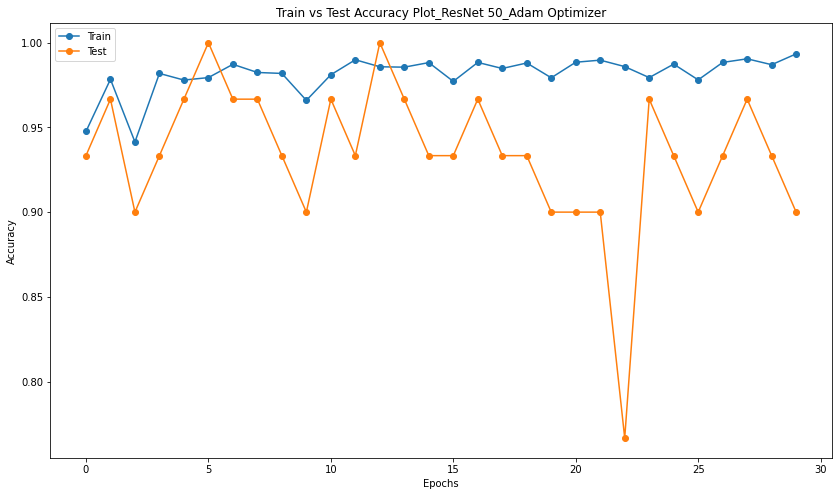

In [20]:
# Train v Test Accuracy Plot_ResNet50_Adam
plt.figure(figsize=(14,8))
plt.plot(train_accuracy,'-o')
plt.plot(test_accuracy,'-o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuracy Plot_ResNet 50_Adam Optimizer')
plt.show()

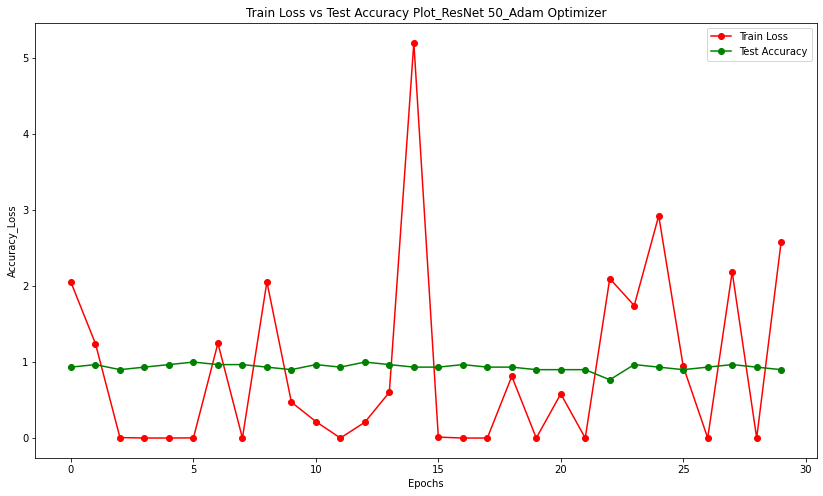

In [22]:
# Train Loss v Test Accuracy Plot_ResNet50_Adam
plt.figure(figsize=(14,8))
plt.plot(train_loss,'-o', color='r')
plt.plot(test_accuracy,'-o', color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy_Loss')
plt.legend(['Train Loss','Test Accuracy'])
plt.title('Train Loss vs Test Accuracy Plot_ResNet 50_Adam Optimizer')
plt.show()

#### Saving Model

In [31]:
# Saving ResNet50 model with Adam optimizer
torch.save(model.state_dict(), os.path.join(owd, 'ResNet50_Adam.pth'))

#### Loading Model

In [ ]:
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.to(device)
# Make sure to call input = input.to(device) on any input tensors that you feed to the model

## ResNet 50 -> SGD with Momentum Optimizer

In [13]:
def train_eval():
    train_accuracy = []
    train_loss     = []
    test_accuracy  = []
    for epoch in range(num_epochs):
        train_acc = 0
        test_acc  = 0

        # Train
        model.train()

        with tqdm(train_loader, unit='batch') as te:
            for image, label in te:
                optimizer.zero_grad()
                image = image.to(device)
                label = label.to(device)

                train_prob = model(image)
                # train_prob = train_prob.cpu() # Assigining train_probabilites to cpu to prevent maxing out of CUDA memory
                loss = loss_fn(train_prob, label)
                loss.backward()
                optimizer.step() # training ends here

                train_pred = torch.max(train_prob, 1).indices  # train predictions
                train_acc += int(torch.sum(train_pred == label)) 

            ep_train_acc = train_acc / len(train_dataset)
            train_accuracy.append(ep_train_acc)
            train_loss.append(loss.item())


        # Evaluate
        model.eval()
        with torch.no_grad():
            for test_image, test_label in test_loader:
                test_image = test_image.to(device)
                test_label = test_label.to(device)
                test_prob  = model(test_image)
                # test_prob  = test_prob.cpu() 

                test_pred  = torch.max(test_prob, 1).indices
                test_acc   += int(torch.sum(test_pred == test_label))

            ep_test_acc = test_acc / len(test_dataset)
            test_accuracy.append(ep_test_acc)

        print(f"Epoch: {epoch+1} Loss: {loss}\nTrain Accuracy: {ep_train_acc} Test Accuracy: {ep_test_acc}")
    
    return train_accuracy, train_loss, test_accuracy
    

In [14]:
model.fc = nn.Linear(in_features=2048, out_features=2)
model = model.to(device)

# Initializing Optimizer
optimizer = SGD(model.parameters(), momentum = 0.5, lr=0.01, weight_decay=0.0001)

# Initializing Loss Function
loss_fn = nn.CrossEntropyLoss()

In [15]:
train_acc_SGD, train_loss_SGD, test_acc_SGD = train_eval()

100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.87batch/s]


Epoch: 1 Loss: 2.7682907581329346
Train Accuracy: 0.9558790593505039 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.43batch/s]


Epoch: 2 Loss: 2.026554739131825e-06
Train Accuracy: 0.9796192609182531 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.34batch/s]


Epoch: 3 Loss: 1.7285317426285474e-06
Train Accuracy: 0.9936170212765958 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.37batch/s]


Epoch: 4 Loss: 0.0022225147113204002
Train Accuracy: 0.993505039193729 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.35batch/s]


Epoch: 5 Loss: 0.53620445728302
Train Accuracy: 0.9918253079507279 Test Accuracy: 0.7666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.34batch/s]


Epoch: 6 Loss: 5.602805231319508e-06
Train Accuracy: 0.9816349384098544 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.28batch/s]


Epoch: 7 Loss: 9.028643608093262
Train Accuracy: 0.9928331466965286 Test Accuracy: 0.8666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.27batch/s]


Epoch: 8 Loss: 3.1053055863594636e-05
Train Accuracy: 0.9854423292273237 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.23batch/s]


Epoch: 9 Loss: 4.1106672286987305
Train Accuracy: 0.9944008958566629 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.28batch/s]


Epoch: 10 Loss: 4.624142169952393
Train Accuracy: 0.9946248600223964 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.24batch/s]


Epoch: 11 Loss: 3.2031800746917725
Train Accuracy: 0.9946248600223964 Test Accuracy: 0.7


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.25batch/s]


Epoch: 12 Loss: 4.046991671202704e-05
Train Accuracy: 0.9789473684210527 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.23batch/s]


Epoch: 13 Loss: 0.001566422637552023
Train Accuracy: 0.9928331466965286 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.21batch/s]


Epoch: 14 Loss: 0.938572108745575
Train Accuracy: 0.9950727883538634 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:01<00:00,  9.14batch/s]


Epoch: 15 Loss: 0.022974038496613503
Train Accuracy: 0.9916013437849944 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:01<00:00,  9.15batch/s]


Epoch: 16 Loss: 3.0398275612242287e-06
Train Accuracy: 0.9947368421052631 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:01<00:00,  9.13batch/s]


Epoch: 17 Loss: 0.0025968775153160095
Train Accuracy: 0.995632698768197 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.26batch/s]


Epoch: 18 Loss: 0.01514250598847866
Train Accuracy: 0.9973124300111982 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.26batch/s]


Epoch: 19 Loss: 6.921681880950928
Train Accuracy: 0.9961926091825308 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.25batch/s]


Epoch: 20 Loss: 1.3492313623428345
Train Accuracy: 0.9928331466965286 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.41batch/s]


Epoch: 21 Loss: 0.012494227848947048
Train Accuracy: 0.9879059350503919 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.32batch/s]


Epoch: 22 Loss: 1.690237283706665
Train Accuracy: 0.9947368421052631 Test Accuracy: 0.8666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.22batch/s]


Epoch: 23 Loss: 5.507165769813582e-05
Train Accuracy: 0.9931690929451288 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.21batch/s]


Epoch: 24 Loss: 0.002062954241409898
Train Accuracy: 0.9957446808510638 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.43batch/s]


Epoch: 25 Loss: 9.119069000007585e-05
Train Accuracy: 0.9970884658454647 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.26batch/s]


Epoch: 26 Loss: 3.594030931708403e-05
Train Accuracy: 0.9975363941769317 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:01<00:00,  9.16batch/s]


Epoch: 27 Loss: 8.21621322631836
Train Accuracy: 0.997872340425532 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.23batch/s]


Epoch: 28 Loss: 3.7550828437815653e-06
Train Accuracy: 0.9942889137737962 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.32batch/s]


Epoch: 29 Loss: 1.001328468322754
Train Accuracy: 0.9984322508398656 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.22batch/s]


Epoch: 30 Loss: 1.5236778259277344
Train Accuracy: 0.990929451287794 Test Accuracy: 0.9


In [16]:
print('Train Accuracy is: ',round(sum(train_acc_SGD)/len(train_acc_SGD),2)*100)
print('Test Accuracy is: ',round(sum(test_acc_SGD)/len(test_acc_SGD),2)*100)

Train Accuracy is:  99.0
Test Accuracy is:  93.0


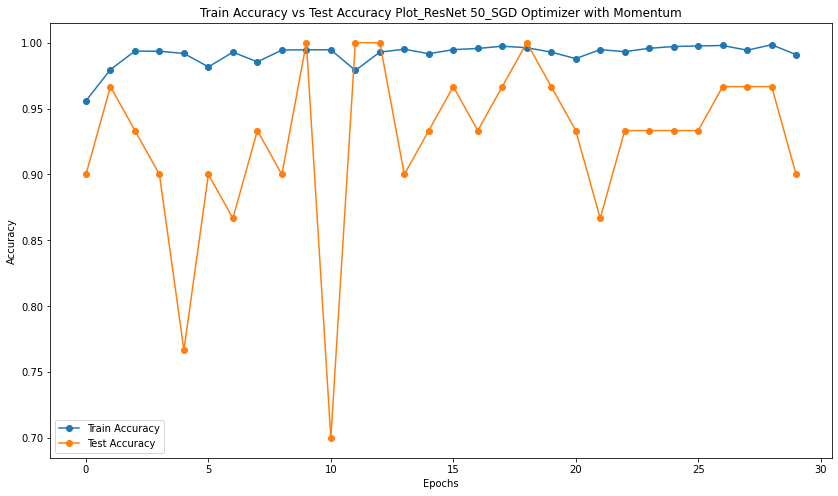

In [17]:
# Train v Test Accuracy Plot_ResNet50_SGD with Momentum
plt.figure(figsize=(14,8))
plt.plot(train_acc_SGD,'-o')
plt.plot(test_acc_SGD,'-o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Train Accuracy vs Test Accuracy Plot_ResNet 50_SGD Optimizer with Momentum')
plt.show()

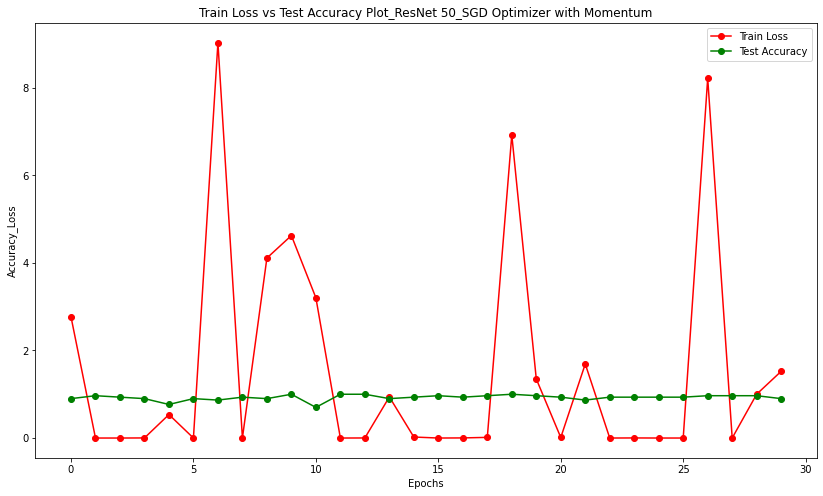

In [18]:
# Train Loss v Test Accuracy Plot_SGD with Momentum
plt.figure(figsize=(14,8))
plt.plot(train_loss_SGD,'-o', color='r')
plt.plot(test_acc_SGD,'-o', color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy_Loss')
plt.legend(['Train Loss','Test Accuracy'])
plt.title('Train Loss vs Test Accuracy Plot_ResNet 50_SGD Optimizer with Momentum')
plt.show()

In [19]:
# Saving ResNet50 model -> SGD Optimizer with momentum
torch.save(model.state_dict(), os.path.join(owd, 'ResNet50_SGD_Momentum.pth'))

## ResNet 50 -> RMSProp Optimizer

In [14]:
model.fc = nn.Linear(in_features=2048, out_features=2)
model = model.to(device)

# Initializing Optimizer
optimizer = RMSprop(model.parameters(), lr=0.01)

# Initializing Loss Function
loss_fn = nn.CrossEntropyLoss()

In [15]:
train_acc_RMS, train_loss_RMS, test_acc_RMS = train_eval()

100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:08<00:00,  8.12batch/s]


Epoch: 1 Loss: 1.1385061740875244
Train Accuracy: 0.6118701007838746 Test Accuracy: 0.5333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.40batch/s]


Epoch: 2 Loss: 0.7249816656112671
Train Accuracy: 0.6347144456886898 Test Accuracy: 0.8666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.38batch/s]


Epoch: 3 Loss: 0.8156958222389221
Train Accuracy: 0.648040313549832 Test Accuracy: 0.7


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.32batch/s]


Epoch: 4 Loss: 0.6703437566757202
Train Accuracy: 0.706942889137738 Test Accuracy: 0.5


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:59<00:00,  9.33batch/s]


Epoch: 5 Loss: 0.579909086227417
Train Accuracy: 0.7550951847704367 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.29batch/s]


Epoch: 6 Loss: 0.18352560698986053
Train Accuracy: 0.8059350503919372 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.26batch/s]


Epoch: 7 Loss: 0.7204267382621765
Train Accuracy: 0.8363941769316909 Test Accuracy: 0.5666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.26batch/s]


Epoch: 8 Loss: 1.5028812885284424
Train Accuracy: 0.8567749160134378 Test Accuracy: 0.7666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.20batch/s]


Epoch: 9 Loss: 1.3211121559143066
Train Accuracy: 0.8789473684210526 Test Accuracy: 0.8333333333333334


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.23batch/s]


Epoch: 10 Loss: 0.8687944412231445
Train Accuracy: 0.8996640537513998 Test Accuracy: 0.7666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.19batch/s]


Epoch: 11 Loss: 0.006211019121110439
Train Accuracy: 0.912989921612542 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.19batch/s]


Epoch: 12 Loss: 0.34670743346214294
Train Accuracy: 0.9247480403135498 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.19batch/s]


Epoch: 13 Loss: 0.6659539341926575
Train Accuracy: 0.9332586786114222 Test Accuracy: 0.8333333333333334


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.19batch/s]


Epoch: 14 Loss: 1.0095677375793457
Train Accuracy: 0.9361702127659575 Test Accuracy: 0.8333333333333334


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.25batch/s]


Epoch: 15 Loss: 0.3180633783340454
Train Accuracy: 0.9449048152295633 Test Accuracy: 0.8666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.19batch/s]


Epoch: 16 Loss: 0.06783667951822281
Train Accuracy: 0.9472564389697649 Test Accuracy: 0.8333333333333334


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.20batch/s]


Epoch: 17 Loss: 0.00023193439119495451
Train Accuracy: 0.951063829787234 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.21batch/s]


Epoch: 18 Loss: 6.794904038542882e-06
Train Accuracy: 0.9530795072788354 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.24batch/s]


Epoch: 19 Loss: 4.309234282118268e-05
Train Accuracy: 0.9558790593505039 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.20batch/s]


Epoch: 20 Loss: 0.00025583256501704454
Train Accuracy: 0.9610302351623741 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.17batch/s]


Epoch: 21 Loss: 2.6025781631469727
Train Accuracy: 0.9637178051511758 Test Accuracy: 0.8333333333333334


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.23batch/s]


Epoch: 22 Loss: 0.518929660320282
Train Accuracy: 0.9668533034714446 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.20batch/s]


Epoch: 23 Loss: 0.43970125913619995
Train Accuracy: 0.9676371780515117 Test Accuracy: 0.6666666666666666


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.22batch/s]


Epoch: 24 Loss: 2.407052755355835
Train Accuracy: 0.9690929451287794 Test Accuracy: 0.5666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.22batch/s]


Epoch: 25 Loss: 0.05624878779053688
Train Accuracy: 0.9725643896976484 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.27batch/s]


Epoch: 26 Loss: 0.0
Train Accuracy: 0.9706606942889138 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.22batch/s]


Epoch: 27 Loss: 0.03302745893597603
Train Accuracy: 0.9708846584546472 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.21batch/s]


Epoch: 28 Loss: 2.651261329650879
Train Accuracy: 0.9748040313549832 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.18batch/s]


Epoch: 29 Loss: 0.002490960992872715
Train Accuracy: 0.9751399776035834 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:00<00:00,  9.22batch/s]


Epoch: 30 Loss: 0.00783980917185545
Train Accuracy: 0.9746920492721165 Test Accuracy: 0.9


In [16]:
print('Train Accuracy is: ',round(sum(train_acc_RMS)/len(train_acc_RMS),2)*100)
print('Test Accuracy is: ',round(sum(test_acc_RMS)/len(test_acc_RMS),2)*100)

Train Accuracy is:  89.0
Test Accuracy is:  83.0


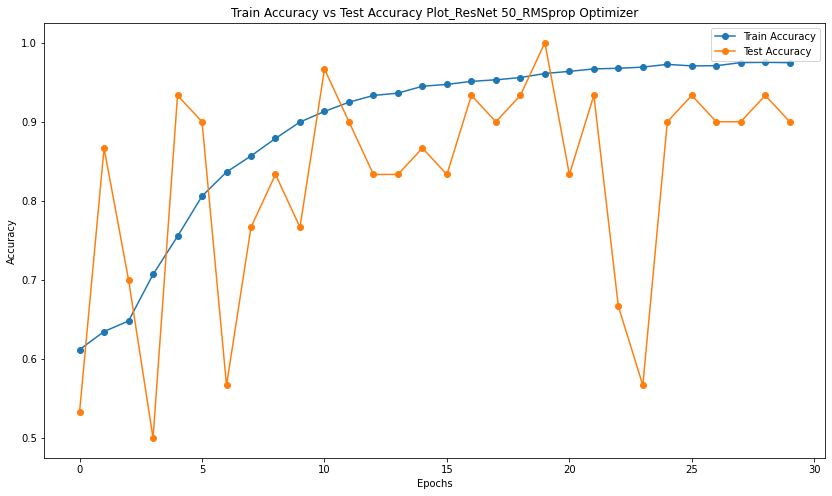

In [17]:
# Train v Test Accuracy Plot_ResNet50_RMSprop Optimizer
plt.figure(figsize=(14,8))
plt.plot(train_acc_RMS,'-o')
plt.plot(test_acc_RMS,'-o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Train Accuracy vs Test Accuracy Plot_ResNet 50_RMSprop Optimizer')
plt.show()

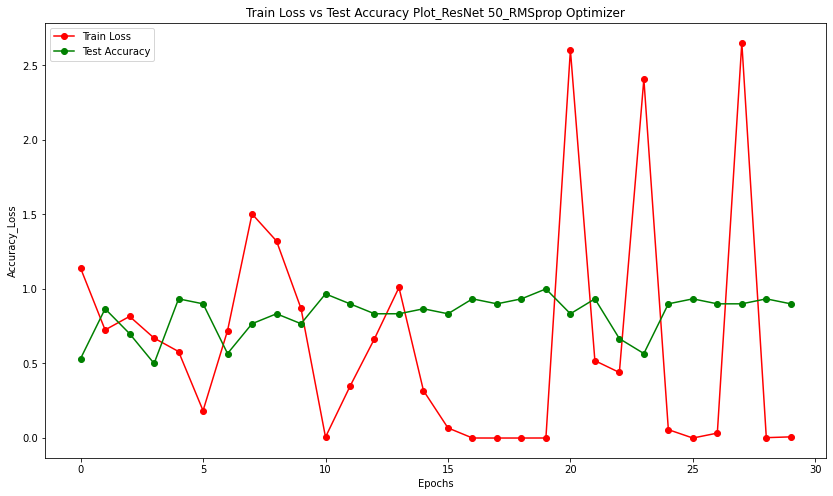

In [18]:
# Train Loss v Test Accuracy Plot_RMSprop Optimizer
plt.figure(figsize=(14,8))
plt.plot(train_loss_RMS,'-o', color='r')
plt.plot(test_acc_RMS,'-o', color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy_Loss')
plt.legend(['Train Loss','Test Accuracy'])
plt.title('Train Loss vs Test Accuracy Plot_ResNet 50_RMSprop Optimizer')
plt.show()

In [22]:
# Saving ResNet50 model -> _RMSprop Optimizer
torch.save(model.state_dict(), os.path.join(owd, 'ResNet50__RMSprop.pth'))

## ResNet 50 -> AdaBound Optimizer

In [21]:
model.fc = nn.Linear(in_features=2048, out_features=2)
model = model.to(device)

# Initializing Optimizer
optimizer = tor_optim.AdaBound(
    model.parameters(),
    lr= 1e-3,
    betas= (0.9, 0.999),
    final_lr = 0.1,
    gamma=1e-3,
    eps= 1e-8,
    weight_decay=0,
    amsbound=False,
)

# Initializing Loss Function
loss_fn = nn.CrossEntropyLoss()

In [22]:
train_acc_adb, train_loss_adb, test_acc_adb = train_eval()

100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.72batch/s]


Epoch: 1 Loss: 2.3937063217163086
Train Accuracy: 0.8945128779395297 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:03<00:00,  8.74batch/s]


Epoch: 2 Loss: 0.00043200707295909524
Train Accuracy: 0.9235162374020157 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.62batch/s]


Epoch: 3 Loss: 2.974547863006592
Train Accuracy: 0.9698768197088465 Test Accuracy: 0.8


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.68batch/s]


Epoch: 4 Loss: 2.7515811920166016
Train Accuracy: 0.8948488241881299 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.69batch/s]


Epoch: 5 Loss: 6.1988448578631505e-06
Train Accuracy: 0.9522956326987682 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.65batch/s]


Epoch: 6 Loss: 5.357121467590332
Train Accuracy: 0.9795072788353864 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:06<00:00,  8.41batch/s]


Epoch: 7 Loss: 5.815229892730713
Train Accuracy: 0.961926091825308 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:06<00:00,  8.46batch/s]


Epoch: 8 Loss: 0.317717969417572
Train Accuracy: 0.9655095184770437 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:07<00:00,  8.33batch/s]


Epoch: 9 Loss: 0.18991059064865112
Train Accuracy: 0.9631578947368421 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:06<00:00,  8.46batch/s]


Epoch: 10 Loss: 0.00032700333395041525
Train Accuracy: 0.9852183650615901 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:07<00:00,  8.33batch/s]


Epoch: 11 Loss: 3.399319648742676
Train Accuracy: 0.9890257558790594 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:06<00:00,  8.36batch/s]


Epoch: 12 Loss: 3.301988908788189e-05
Train Accuracy: 0.9625979843225084 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:06<00:00,  8.45batch/s]


Epoch: 13 Loss: 4.081602096557617
Train Accuracy: 0.9876819708846585 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:06<00:00,  8.45batch/s]


Epoch: 14 Loss: 1.5943629741668701
Train Accuracy: 0.9144456886898096 Test Accuracy: 0.6333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:07<00:00,  8.31batch/s]


Epoch: 15 Loss: 0.0010098678758367896
Train Accuracy: 0.844120940649496 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:05<00:00,  8.48batch/s]


Epoch: 16 Loss: 0.9658887386322021
Train Accuracy: 0.9491601343784994 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:05<00:00,  8.52batch/s]


Epoch: 17 Loss: 0.00019075811724178493
Train Accuracy: 0.9502799552071669 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.63batch/s]


Epoch: 18 Loss: 0.0012601395137608051
Train Accuracy: 0.9791713325867861 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.62batch/s]


Epoch: 19 Loss: 0.03359159082174301
Train Accuracy: 0.9835386338185891 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.62batch/s]


Epoch: 20 Loss: 0.18699799478054047
Train Accuracy: 0.9884658454647256 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.61batch/s]


Epoch: 21 Loss: 0.02681267261505127
Train Accuracy: 0.9835386338185891 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.61batch/s]


Epoch: 22 Loss: 2.3623206615448
Train Accuracy: 0.987010078387458 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.64batch/s]


Epoch: 23 Loss: 6.16274046478793e-05
Train Accuracy: 0.9823068309070548 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.63batch/s]


Epoch: 24 Loss: 6.627597031183541e-05
Train Accuracy: 0.9907054871220605 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.63batch/s]


Epoch: 25 Loss: 5.560766220092773
Train Accuracy: 0.9938409854423292 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.63batch/s]


Epoch: 26 Loss: 0.09053414314985275
Train Accuracy: 0.9704367301231803 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:05<00:00,  8.57batch/s]


Epoch: 27 Loss: 5.54321240997524e-06
Train Accuracy: 0.9903695408734603 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.65batch/s]


Epoch: 28 Loss: 1.3014320135116577
Train Accuracy: 0.9936170212765958 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.65batch/s]


Epoch: 29 Loss: 3.111308615189046e-05
Train Accuracy: 0.9806270996640537 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [01:04<00:00,  8.64batch/s]


Epoch: 30 Loss: 1.788137637959153e-06
Train Accuracy: 0.9946248600223964 Test Accuracy: 0.9333333333333333


In [23]:
print('Train Accuracy is: ',round(sum(train_acc_adb)/len(train_acc_adb),2)*100)
print('Test Accuracy is: ',round(sum(test_acc_adb)/len(test_acc_adb),2)*100)

Train Accuracy is:  96.0
Test Accuracy is:  93.0


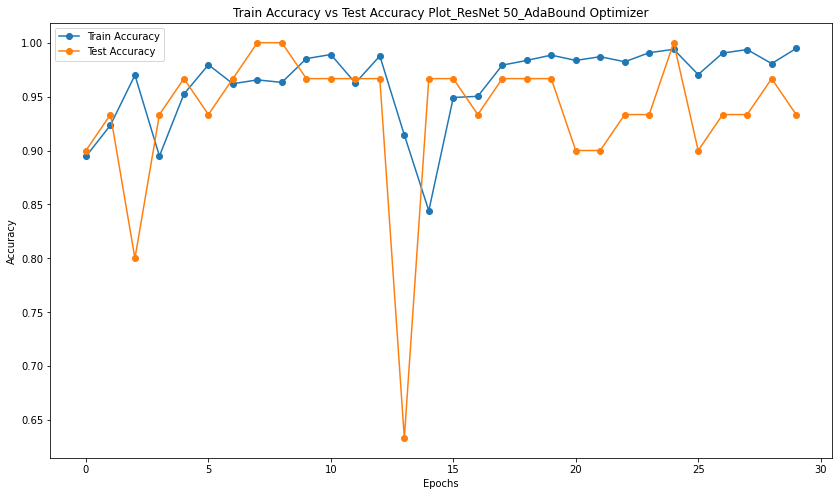

In [24]:
# Train v Test Accuracy Plot_ResNet50_AdaBound
plt.figure(figsize=(14,8))
plt.plot(train_acc_adb,'-o')
plt.plot(test_acc_adb,'-o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Train Accuracy vs Test Accuracy Plot_ResNet 50_AdaBound Optimizer')
plt.show()

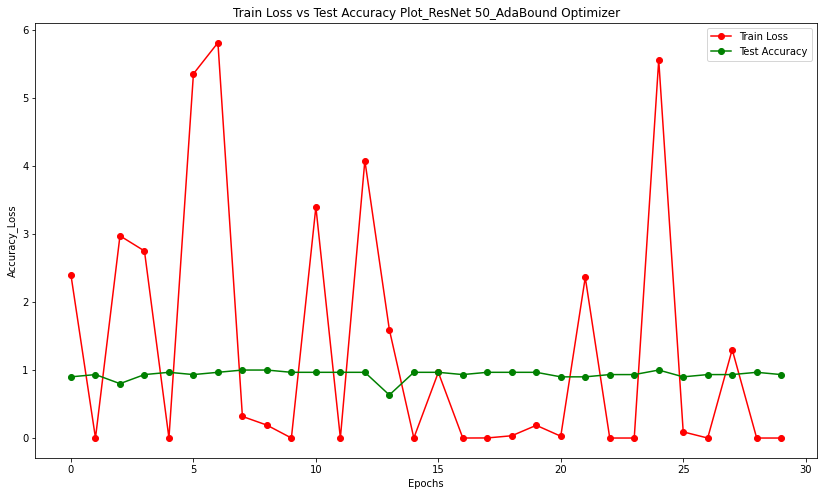

In [25]:
# Train Loss v Test Accuracy Plot_AdaBound
plt.figure(figsize=(14,8))
plt.plot(train_loss_adb,'-o', color='r')
plt.plot(test_acc_adb,'-o', color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy_Loss')
plt.legend(['Train Loss','Test Accuracy'])
plt.title('Train Loss vs Test Accuracy Plot_ResNet 50_AdaBound Optimizer')
plt.show()

In [26]:
# Saving ResNet50 model -> AdaBound Optimizer
torch.save(model.state_dict(), os.path.join(owd, 'ResNet50__AdaBound.pth'))

## ShuffleNet v2 with AdaBound Optimizer

In [30]:
# Loading pre-trained ShuffleNet v2 model
shufflenet = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=True)
shufflenet

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to C:\Users\abhij/.cache\torch\hub\v0.10.0.zip
Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to C:\Users\abhij/.cache\torch\hub\checkpoints\shufflenetv2_x1-5666bf0f80.pth


  0%|          | 0.00/8.79M [00:00<?, ?B/s]

ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_

In [31]:
# Chaning the output layer of the shufflenet v2 model
shufflenet.fc = nn.Linear(in_features=1024, out_features=2)
shufflenet = shufflenet.to(device)
shufflenet

ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_

In [32]:
# Initializing Optimizer
optimizer = tor_optim.AdaBound(
    shufflenet.parameters(),
    lr= 1e-3,
    betas= (0.9, 0.999),
    final_lr = 0.1,
    gamma=1e-3,
    eps= 1e-8,
    weight_decay=0,
    amsbound=False,
)

# Initializing Loss Function
loss_fn = nn.CrossEntropyLoss()

In [33]:
train_accuracy = []
train_loss     = []
test_accuracy  = []
for epoch in range(num_epochs):
    train_acc = 0
    test_acc  = 0
    
    # Train
    shufflenet.train()
    
    with tqdm(train_loader, unit='batch') as te:
        for image, label in te:
            optimizer.zero_grad()
            image = image.to(device)
            label = label.to(device)
            
            train_prob = shufflenet(image)
            # train_prob = train_prob.cpu() # Assigining train_probabilites to cpu to prevent maxing out of CUDA memory
            loss = loss_fn(train_prob, label)
            loss.backward()
            optimizer.step() # training ends here
            
            train_pred = torch.max(train_prob, 1).indices  # train predictions
            train_acc += int(torch.sum(train_pred == label)) 
            
        ep_train_acc = train_acc / len(train_dataset)
        train_accuracy.append(ep_train_acc)
        train_loss.append(loss.item())
        
        
    # Evaluate
    shufflenet.eval()
    with torch.no_grad():
        for test_image, test_label in test_loader:
            test_image = test_image.to(device)
            test_label = test_label.to(device)
            test_prob  = shufflenet(test_image)
            # test_prob  = test_prob.cpu() 
            
            test_pred  = torch.max(test_prob, 1).indices
            test_acc   += int(torch.sum(test_pred == test_label))
            
        ep_test_acc = test_acc / len(test_dataset)
        test_accuracy.append(ep_test_acc)
    
    print(f"Epoch: {epoch+1} Loss: {loss}\nTrain Accuracy: {ep_train_acc} Test Accuracy: {ep_test_acc}")

100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:53<00:00, 10.36batch/s]


Epoch: 1 Loss: 0.001170988311059773
Train Accuracy: 0.9556550951847704 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.18batch/s]


Epoch: 2 Loss: 0.0005334209417924285
Train Accuracy: 0.9871220604703248 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.25batch/s]


Epoch: 3 Loss: 0.6611819863319397
Train Accuracy: 0.9911534154535274 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.28batch/s]


Epoch: 4 Loss: 0.0007464689551852643
Train Accuracy: 0.9903695408734603 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.31batch/s]


Epoch: 5 Loss: 6.824268348282203e-05
Train Accuracy: 0.9936170212765958 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:53<00:00, 10.38batch/s]


Epoch: 6 Loss: 6.764670251868665e-05
Train Accuracy: 0.9933930571108622 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.32batch/s]


Epoch: 7 Loss: 0.0002752977597992867
Train Accuracy: 0.9918253079507279 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:52<00:00, 10.59batch/s]


Epoch: 8 Loss: 6.132942507974803e-05
Train Accuracy: 0.9967525195968645 Test Accuracy: 0.9


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.29batch/s]


Epoch: 9 Loss: 0.06351789832115173
Train Accuracy: 0.9965285554311311 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:53<00:00, 10.35batch/s]


Epoch: 10 Loss: 3.3619954586029053
Train Accuracy: 0.9957446808510638 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.27batch/s]


Epoch: 11 Loss: 4.4641892600338906e-05
Train Accuracy: 0.9923852183650615 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:53<00:00, 10.39batch/s]


Epoch: 12 Loss: 0.00010429726535221562
Train Accuracy: 0.996976483762598 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:53<00:00, 10.45batch/s]


Epoch: 13 Loss: 0.03032296895980835
Train Accuracy: 0.9966405375139977 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.20batch/s]


Epoch: 14 Loss: 0.17468111217021942
Train Accuracy: 0.995632698768197 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:55<00:00, 10.06batch/s]


Epoch: 15 Loss: 0.013035161420702934
Train Accuracy: 0.9949608062709966 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:53<00:00, 10.47batch/s]


Epoch: 16 Loss: 0.08821965008974075
Train Accuracy: 0.9961926091825308 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:56<00:00,  9.86batch/s]


Epoch: 17 Loss: 5.426653861999512
Train Accuracy: 0.9972004479283315 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:56<00:00,  9.96batch/s]


Epoch: 18 Loss: 5.11236047744751
Train Accuracy: 0.9949608062709966 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.28batch/s]


Epoch: 19 Loss: 0.0005655117565765977
Train Accuracy: 0.9923852183650615 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.23batch/s]


Epoch: 20 Loss: 0.00012503495963755995
Train Accuracy: 0.9967525195968645 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.32batch/s]


Epoch: 21 Loss: 0.04777643457055092
Train Accuracy: 0.9975363941769317 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.28batch/s]


Epoch: 22 Loss: 0.029538705945014954
Train Accuracy: 0.9973124300111982 Test Accuracy: 1.0


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.25batch/s]


Epoch: 23 Loss: 0.0160764642059803
Train Accuracy: 0.9976483762597984 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.28batch/s]


Epoch: 24 Loss: 0.001174322096630931
Train Accuracy: 0.9977603583426652 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:55<00:00, 10.13batch/s]


Epoch: 25 Loss: 0.014357710257172585
Train Accuracy: 0.9983202687569989 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.24batch/s]


Epoch: 26 Loss: 4.249507904052734
Train Accuracy: 0.9983202687569989 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:55<00:00, 10.14batch/s]


Epoch: 27 Loss: 1.2934045116708148e-05
Train Accuracy: 0.996080627099664 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.29batch/s]


Epoch: 28 Loss: 0.00030508331838063896
Train Accuracy: 0.997424412094065 Test Accuracy: 0.9666666666666667


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:55<00:00, 10.14batch/s]


Epoch: 29 Loss: 6.788510654587299e-05
Train Accuracy: 0.9986562150055991 Test Accuracy: 0.9333333333333333


100%|█████████████████████████████████████████████████████████████████████████████| 559/559 [00:54<00:00, 10.34batch/s]


Epoch: 30 Loss: 4.470328349270858e-06
Train Accuracy: 0.9984322508398656 Test Accuracy: 0.9666666666666667


In [34]:
print('Train Accuracy is: ',round(sum(train_accuracy)/len(train_accuracy),2)*100)
print('Test Accuracy is: ',round(sum(test_accuracy)/len(test_accuracy),2)*100)

Train Accuracy is:  99.0
Test Accuracy is:  97.0


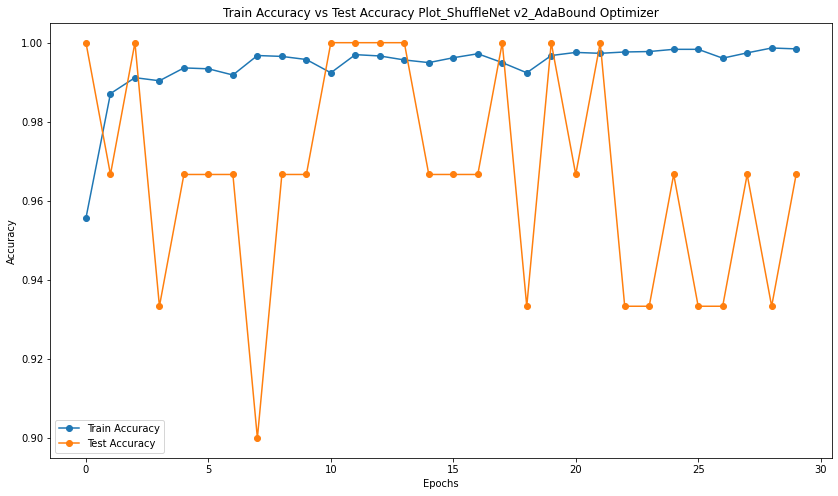

In [35]:
# Train v Test Accuracy Plot_ShuffleNet v2_AdaBound
plt.figure(figsize=(14,8))
plt.plot(train_accuracy,'-o')
plt.plot(test_accuracy,'-o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Train Accuracy vs Test Accuracy Plot_ShuffleNet v2_AdaBound Optimizer')
plt.show()

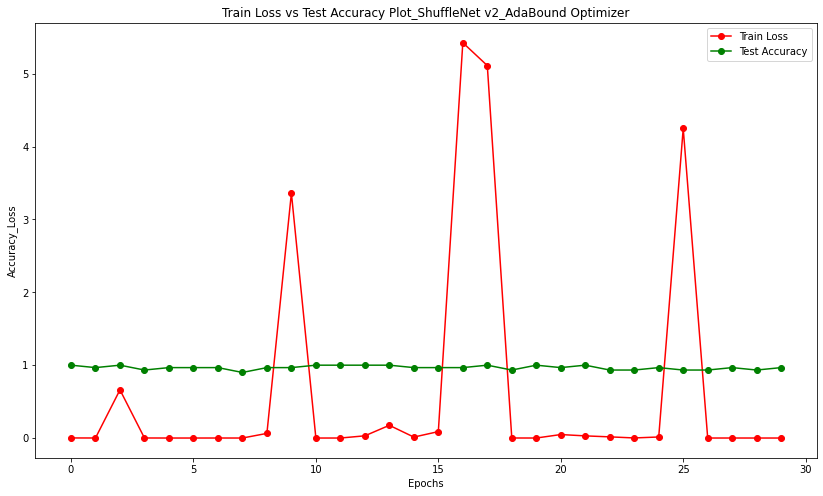

In [36]:
# Train Loss v Test Accuracy Plot_AdaBound
plt.figure(figsize=(14,8))
plt.plot(train_loss,'-o', color='r')
plt.plot(test_accuracy,'-o', color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy_Loss')
plt.legend(['Train Loss','Test Accuracy'])
plt.title('Train Loss vs Test Accuracy Plot_ShuffleNet v2_AdaBound Optimizer')
plt.show()

In [37]:
# Saving ShuffleNet v2 model -> AdaBound Optimizer
torch.save(shufflenet.state_dict(), os.path.join(owd, 'ShuffleNet v2__AdaBound.pth'))